In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Choisir le match

In [2]:
# rep="/Users/gilles/Downloads/Traitements_GB/"
rep="/Users/gilles/Github/AMBK-SportsCom/Chaines/Traitements_GB/"
match="FrNz"
match="FrAr"
nFile=match+"-RefSynTour.xlsx"

writer = pd.ExcelWriter(rep+match+"-Stats-RefSynTour.xlsx", engine="xlsxwriter")

In [3]:
df=pd.read_excel(rep+nFile,index_col=0)
df.head()

,Transcription,Cat,Lemme,Referent,numChaine,chaineIndex,chaineDep,chaineApp,nPhrase,tour,type,tDeb,tFin,speaker,Mi-temps
0,après,PRP,après,NaN,NaN,NaN,NaN,NaN,0,spk1-001,Colour commentary,00:12:24.60,00:12:28.32,spk1,1.0
1,avoir,VER:infi,avoir,NaN,NaN,NaN,NaN,NaN,0,spk1-001,Colour commentary,00:12:24.60,00:12:28.32,spk1,1.0
2,demandé,VER:pper,demander,NaN,NaN,NaN,NaN,NaN,0,spk1-001,Colour commentary,00:12:24.60,00:12:28.32,spk1,1.0
3,si,KON,si,NaN,NaN,NaN,NaN,NaN,0,spk1-001,Colour commentary,00:12:24.60,00:12:28.32,spk1,1.0
4,tout,PRO:IND,tout,NaN,NaN,NaN,NaN,NaN,0,spk1-001,Colour commentary,00:12:24.60,00:12:28.32,spk1,1.0


In [4]:
nbMots=len(df[~df.Cat.isin(["PUN","SENT"])])
print(match,nbMots)

FrAr 16961


## Calcul des longueurs de chaines

In [5]:
maxNumChaine=int(df.numChaine.max())
maxNumChaine

1088

### Extraire les chaines par mi-temps

In [16]:
def extractChaines(df,mt=[1,2]):
    dChaines={}
    lChaines={}
    for num in range(maxNumChaine):
        n=num+1
        dfChaine=df.loc[df.numChaine==n]
        if len(dfChaine)>0 and dfChaine.iloc[0]["Mi-temps"] in mt:
            try:
                dChaines[n]={"ref":dfChaine.Referent.values[0],"chaine":{}}
                indexMax=int(dfChaine.chaineIndex.max())
                if indexMax not in lChaines:
                    lChaines[indexMax]=0
                lChaines[indexMax]+=1
                for ind in range(indexMax):
                    i=ind+1
                    dfIndex=dfChaine.loc[dfChaine.chaineIndex==i]
                    dChaines[n]["chaine"][i]=dfIndex[["Cat",
                                                     "Transcription",
                                                     "speaker",
                                                     "Mi-temps"]].to_dict()
            except:
                print("pb",n,end=", ")
                # display(dfChaine)
    return dChaines,lChaines

In [17]:
chaines,lChaines=extractChaines(df,mt=[1,2])
chainesM1,lChainesM1=extractChaines(df,mt=[1])
chainesM2,lChainesM2=extractChaines(df,mt=[2])

In [18]:
print(lChainesM)
print(lChainesM1)
print(lChainesM2)

{1: 662, 4: 42, 3: 119, 2: 164, 9: 7, 5: 20, 12: 1, 6: 17, 11: 4, 13: 2, 8: 1, 7: 7, 10: 1}
{1: 322, 4: 20, 3: 62, 2: 75, 9: 4, 5: 7, 12: 1, 6: 9, 11: 2, 13: 2, 8: 1, 7: 3, 10: 1}
{2: 89, 1: 340, 3: 57, 11: 2, 7: 4, 9: 3, 4: 22, 6: 8, 5: 13}


#### Calcul de la longueur maximale des chaines

In [19]:
maxLChaines=max(lChaines.keys())
for l in range(maxLChaines):
    if l+1 not in lChaines:
        lChaines[l+1]=0
colors = sns.color_palette('pastel',n_colors=maxLChaines)

### Assemblage de la distribution des longueurs
- par mi-temps *MT1*, *MT2*
- pour le match *Match*

In [20]:
sM1=pd.Series(lChainesM1).sort_index()
sM2=pd.Series(lChainesM2).sort_index()
dfDistLong=pd.DataFrame([sM1,sM2]).T
dfDistLong.columns="MT1 MT2".split(" ")
dfDistLong["Match"]=dfDistLong.MT1+dfDistLong.MT2
dfDistLong

,MT1,MT2,Match
1,322.0,340.0,662.0
2,75.0,89.0,164.0
3,62.0,57.0,119.0
4,20.0,22.0,42.0
5,7.0,13.0,20.0
6,9.0,8.0,17.0
7,3.0,4.0,7.0
8,1.0,NaN,NaN
9,4.0,3.0,7.0
10,1.0,NaN,NaN


#### Nombre de chaines par longueur

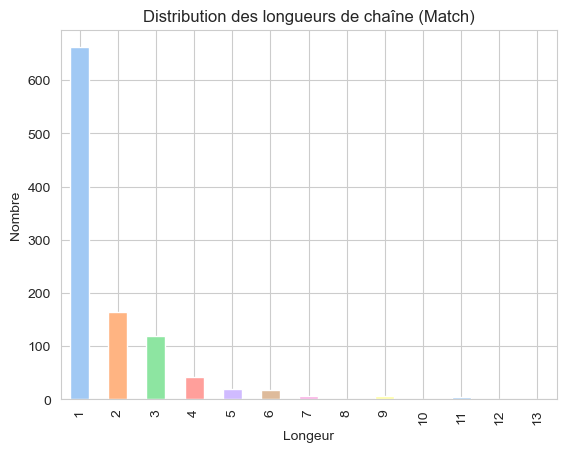

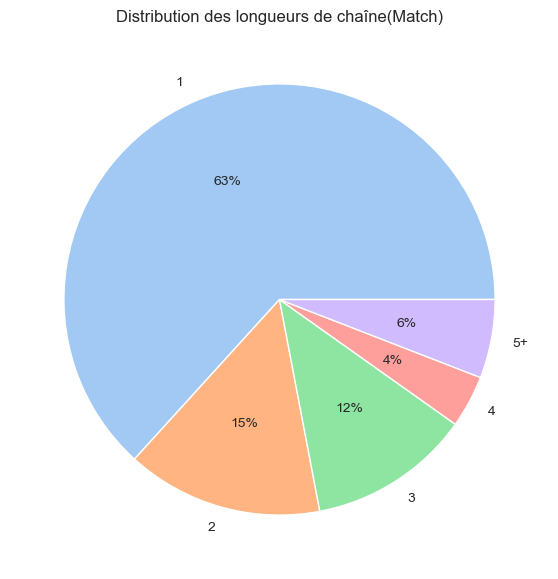

In [21]:
pieCut=4
col=2
# dfDistLong=pd.DataFrame.from_dict(lChaines,orient="index").sort_index().iloc[0:]
dfDistLong.name="Longueur de chaine"
dfDistLong.plot.bar(y=col,
                    color=colors,
                    ylabel="Nombre",xlabel="Longeur",
                    title="Distribution des longueurs de chaîne (%s)"%dfDistLong.columns[col],
                    legend=False)
plt.savefig("JE-BP-LongChaines-%s.pdf"%match,bbox_inches="tight")
dfTemp=dfDistLong[:pieCut].copy()
autres=pd.DataFrame(dfDistLong[pieCut:].sum()).T
autres.index=["%d+"%(pieCut+1)]
dfTemp=pd.concat([dfTemp,autres])
ax=dfTemp.plot.pie(y=0,colors=colors, autopct='%.0f%%',title="Distribution des longueurs de chaîne(%s)"%dfDistLong.columns[col],figsize=(7,7),legend=False)
ax.set_ylabel(None)
# dfTemp.to_excel("DistLongChaine-%s.xlsx"%match)
plt.savefig("JE-PC-LongChaines-%s.pdf"%match,bbox_inches="tight")

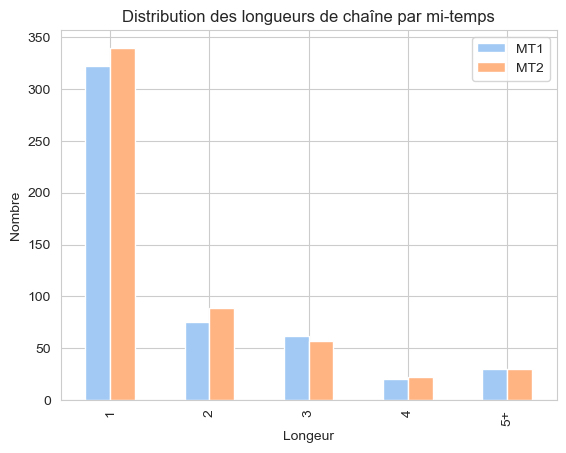

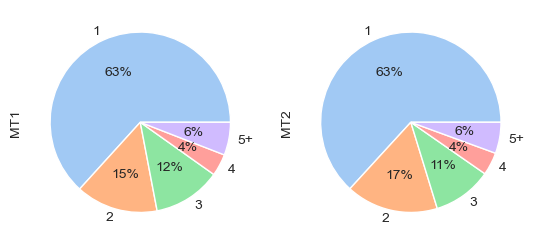

In [24]:
# dfDistLong=pd.DataFrame.from_dict(lChaines,orient="index").sort_index().iloc[0:]
dfDistLong.name="Longueur de chaine"
dfTemp=dfDistLong[:pieCut].copy()
autres=pd.DataFrame(dfDistLong[pieCut:].sum()).T
autres.index=["%d+"%(pieCut+1)]
dfTemp=pd.concat([dfTemp,autres])
ax=dfTemp.iloc[:,[0,1]].plot.bar(color=colors,
                    ylabel="Nombre",xlabel="Longeur",
                    title="Distribution des longueurs de chaîne par mi-temps",
                    legend=True)
plt.savefig("JE-BP-LongChaines-%s-MT.pdf"%match,bbox_inches="tight")

ax=dfTemp.iloc[:,[0,1]].plot.pie(colors=colors, autopct='%.0f%%',legend=False,subplots=True)
# ax.set_ylabel(None)
# dfTemp.to_excel("DistLongChaine-%s-MT.xlsx"%match)
plt.savefig("JE-PC-LongChaines-%s-MT.pdf"%match,bbox_inches="tight")

In [25]:
dfDistLong.to_excel(writer, sheet_name="Dist-Long")

#### Nombre de chaines par longueur par référent

In [26]:
refChaines={}
lRefChaines={}#
# print(lRefChaines)
for k,v in chaines.items():
    ref=chaines[k]["ref"]
    chaine=chaines[k]["chaine"]
    if ref not in refChaines:
        refChaines[ref]=[]
        lRefChaines[ref]={i:0 for i in range(1,maxLChaines+1)}
    refChaines[ref].append(chaines[k]["chaine"])
    longueur=max(chaines[k]["chaine"].keys())
    if longueur not in lRefChaines[ref]:
        lRefChaines[ref][longueur]=0
    lRefChaines[ref][longueur]+=1
dfRefChaines=pd.DataFrame.from_dict(lRefChaines).sort_index().T

dfRefChaines["sum"]=dfRefChaines.iloc[:,0:maxLChaines].sum(axis=1)
dfRefChaines=dfRefChaines.sort_values(by='sum',ascending=False)
dfRefChaines=dfRefChaines.drop(columns="sum")
display(dfRefChaines.head())

,1,2,3,4,5,6,7,8,9,10,11,12,13
GTF,50,26,16,8,3,2,0,0,2,0,0,0,0
GTA,58,12,10,2,2,5,2,0,0,0,1,0,1
J-F9,46,4,3,2,1,2,0,0,0,0,0,0,0
J-F10,32,7,4,3,3,1,0,0,0,0,0,0,0
thierry,34,4,2,1,0,0,0,0,0,0,1,0,1


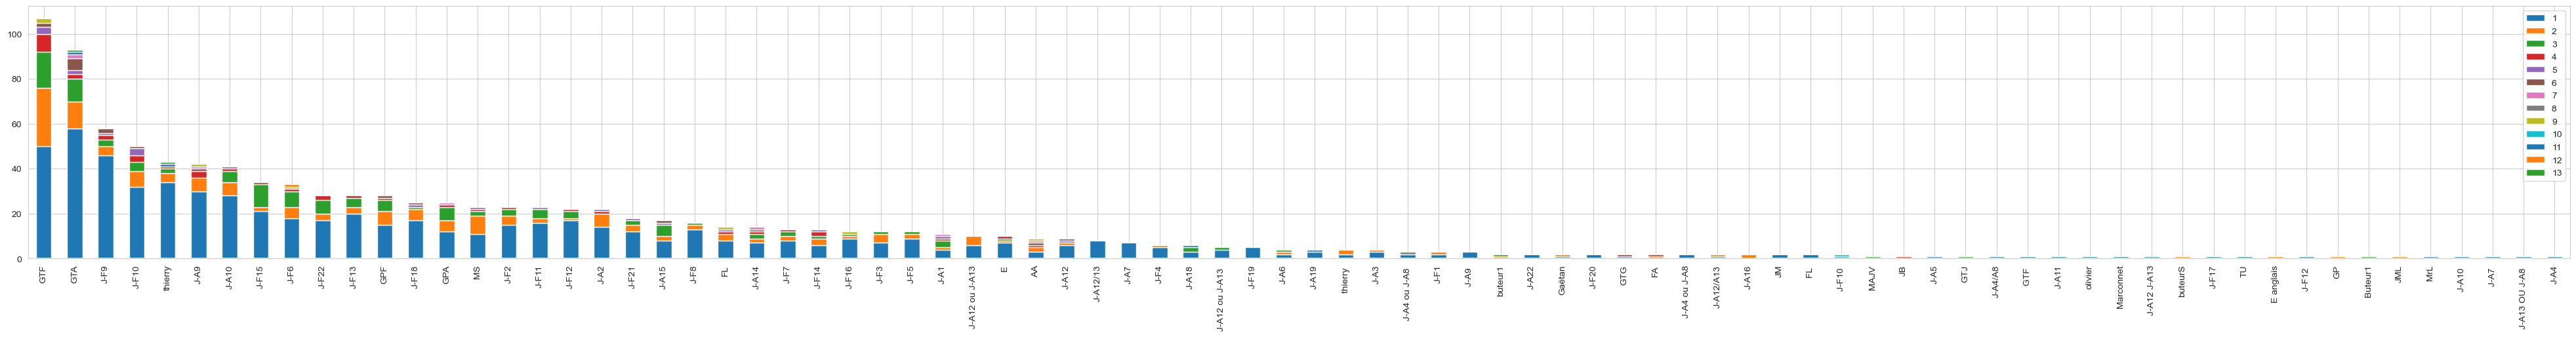

In [27]:
dfRefChaines.plot(kind="bar",stacked=True,figsize=(50,5))
plt.savefig("JE-SB-DistChaines-%s.pdf"%match)

In [28]:
dfRefChaines.to_excel(writer, sheet_name="Ref-Dist-Long")

#### Calcul des roots par catégorie
- chaineIndex renseignée
- chaineDep==0 root

In [30]:
lCat=df[(df.chaineIndex.notnull())&(df.chaineDep==0)]["Cat"].unique().tolist()
print(lCat)
lCat=[c for c in lCat if c in "NAM PRO:REL PRO:PER NOM DET:POS PRO:DEM PRO:IND PRP:det".split(" ")]
lCat

['NAM', 'NOM', 'DET:ART', 'ADJ', 'PRO:DEM', 'PRP:det', 'VER:cond', 'VER:pres', 'PRP', 'VER:futu', 'PRO:PER', 'VER:pper', 'NUM', 'VER:infi', 'VER:simp', 'VER:impe', 'DET:POS', 'VER:subi', 'ADV', 'KON', 'ABR', 'SENT']


['NAM', 'NOM', 'PRO:DEM', 'PRP:det', 'PRO:PER', 'DET:POS']

In [31]:
print(match)
catTable=df[(df.chaineIndex.notnull())&(df.chaineDep==0)].groupby("Cat").count()[["Lemme"]].loc[lCat]
display(catTable)
print(catTable.sum())

FrAr


,Lemme
Cat,
NAM,937
NOM,358
PRO:DEM,19
PRP:det,36
PRO:PER,46
DET:POS,8


Lemme    1404
dtype: int64


In [32]:
catTable.to_excel(writer, sheet_name="Dist-Cat-root")

#### Calcul du nombre de reprises par catégorie
- chaineIndex renseignée
- chaineDep différent de root (≠0)

In [33]:
print(match)
catTable=df[(df.chaineIndex.notnull())&(df.chaineDep>0)].groupby("Cat").count()[["Lemme"]].loc[lCat]
display(catTable)
print(catTable.sum())

FrAr


,Lemme
Cat,
NAM,12
NOM,27
PRO:DEM,2
PRP:det,3
PRO:PER,462
DET:POS,56


Lemme    562
dtype: int64


In [34]:
catTable.to_excel(writer, sheet_name="Dist-Cat-reprises")

#### Détail des reprises

In [35]:
dfGroupReprises=df[(df.chaineIndex.notnull())&(df.chaineDep>0)].groupby(["numChaine","chaineIndex"])[["Cat","Transcription"]].agg(lambda x: " ".join(x))
dfGroupReprises.to_excel(writer, sheet_name="Reprises")

In [36]:
print(match,len(dfGroupReprises),nbMots,"%2.1f%%"%(len(dfGroupReprises)/nbMots*100))

FrAr 698 16961 4.1%


#### Détail des références

In [37]:
dfGroupeReferents=df[(df.chaineIndex.notnull())].groupby(["numChaine","chaineIndex"])[["Cat","Transcription"]].agg(" ".join)
dfGroupeReferents.to_excel(writer, sheet_name="Ref-Groupes")
dfGroupeReferents

Cat Transcription
numChaine chaineIndex                       
1.0       1.0          NAM NAM  David Skrela
2.0       1.0              NOM       Roncero
3.0       1.0              NAM        Pichot
4.0       1.0              NAM     Hernandez
          2.0          PRO:PER            il
...                        ...           ...
1085.0    1.0              NAM       Corleto
          2.0              NAM       Corleto
1086.0    1.0              NAM        France
1087.0    1.0              ADJ     Argentine
1088.0    1.0              NAM       Thierry

[1811 rows x 2 columns]

In [38]:
print(match,len(dfGroupeReferents),nbMots,"%2.1f%%"%(len(dfGroupeReferents)/nbMots*100))

FrAr 1811 16961 10.7%


In [39]:
print(dfGroupeReferents.to_string())

                                                                           Cat                                                          Transcription
numChaine chaineIndex                                                                                                                                
1.0       1.0                                                          NAM NAM                                                           David Skrela
2.0       1.0                                                              NOM                                                                Roncero
3.0       1.0                                                              NAM                                                                 Pichot
4.0       1.0                                                              NAM                                                              Hernandez
          2.0                                                          PRO:PER                      

### Stats par speaker

In [40]:
dfChaine=df.loc[df.numChaine==5]
dfChaine.iloc[0]["Mi-temps"]

1.0

In [41]:
def extractSpk(df,mt=[1,2]):
    chainesSpk={}
    spkChaines={}
    for num in range(maxNumChaine):
        n=num+1
        dfChaine=df.loc[df.numChaine==n]
        if len(dfChaine)>0 and dfChaine.iloc[0]["Mi-temps"] in mt:
            # display(dfChaine)
            try:
                chainesSpk[n]={"spk":dfChaine.speaker.values[0],
                               "ref":dfChaine.Referent.values[0],
                               "chaine":{}}
                indexMax=int(dfChaine.chaineIndex.max())
                # print(indexMax)
                if indexMax not in spkChaines:
                    spkChaines[indexMax]=0
                spkChaines[indexMax]+=1
                for ind in range(indexMax):
                    i=ind+1
                    dfIndex=dfChaine.loc[dfChaine.chaineIndex==i]
                    # display(dfIndex)
                    chainesSpk[n]["chaine"][i]=dfIndex[["Cat","Transcription"]].to_dict()
            except:
                print("pb",n,end=", ")
    return chainesSpk,spkChaines

In [42]:
chainesSpk,spkChaines=extractSpk(df,mt=[1,2])
chainesSpkM1,spkChainesM1=extractSpk(df,mt=[1])
chainesSpkM2,spkChainesM2=extractSpk(df,mt=[2])

In [43]:
print(spkChaines)
print(spkChainesM1)
print(spkChainesM2)


{1: 662, 4: 42, 3: 119, 2: 164, 9: 7, 5: 20, 12: 1, 6: 17, 11: 4, 13: 2, 8: 1, 7: 7, 10: 1}
{1: 322, 4: 20, 3: 62, 2: 75, 9: 4, 5: 7, 12: 1, 6: 9, 11: 2, 13: 2, 8: 1, 7: 3, 10: 1}
{2: 89, 1: 340, 3: 57, 11: 2, 7: 4, 9: 3, 4: 22, 6: 8, 5: 13}


#### longueur de chaines par speaker

In [44]:
def longChainesSpk(chainesSpk):
    spkLen={"spk1":{n+1:0 for n in range(14)},"spk2":{n+1:0 for n in range(14)}}
    
    for k,v in chainesSpk.items():
        if v['spk']==v['spk']:
            spks=v['spk'].split(" ")
            for spk in spks:
                lK=len(v["chaine"])
                if spk not in spkLen:
                    spkLen[spk]={}
                if lK not in spkLen[spk]:
                    spkLen[spk][lK]=0
                spkLen[spk][lK]+=1
    return spkLen

In [45]:
spkLen=longChainesSpk(chainesSpk)
spkLenM1=longChainesSpk(chainesSpkM1)
spkLenM2=longChainesSpk(chainesSpkM2)

In [60]:
dfDistLongM1=pd.DataFrame.from_dict(spkLenM1,orient="index").sort_index().T[["spk1","spk2"]]
dfDistLongM2=pd.DataFrame.from_dict(spkLenM2,orient="index").sort_index().T[["spk1","spk2"]]
dfDistLong=pd.concat([dfDistLongM1,dfDistLongM2],axis=1)
dfDistLong.columns=["spk1M1","spk2M1","spk1M2","spk2M2"]
dfDistLong["spk1"]=dfDistLong["spk1M1"]+dfDistLong["spk1M2"]
dfDistLong["spk2"]=dfDistLong["spk2M1"]+dfDistLong["spk2M2"]
dfDistLong

,spk1M1,spk2M1,spk1M2,spk2M2,spk1,spk2
1,229.0,60.0,271.0,44.0,500.0,104.0
2,50.0,19.0,65.0,17.0,115.0,36.0
3,34.0,21.0,38.0,13.0,72.0,34.0
4,8.0,12.0,14.0,6.0,22.0,18.0
5,5.0,1.0,8.0,3.0,13.0,4.0
6,2.0,6.0,4.0,4.0,6.0,10.0
7,3.0,0.0,3.0,0.0,6.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,3.0,0.0,3.0,1.0,6.0
10,1.0,0.0,0.0,0.0,1.0,0.0


##### Nombre de chaines par longueur

In [48]:
dfDistLong=pd.DataFrame.from_dict(spkLen,orient="index").sort_index().T[["spk1","spk2"]]

<Axes: title={'center': 'Distribution des longueurs de chaîne'}, xlabel='Longeur', ylabel='Nombre'>

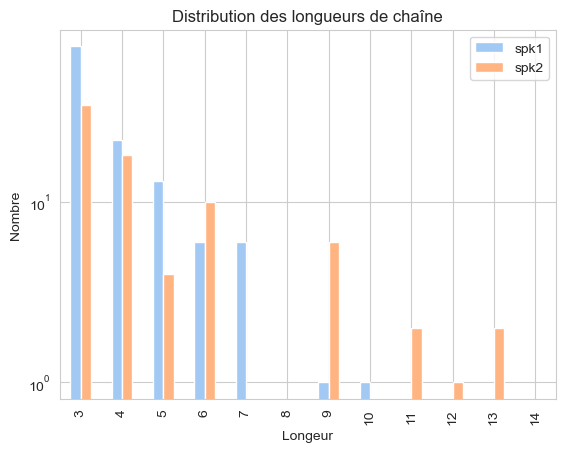

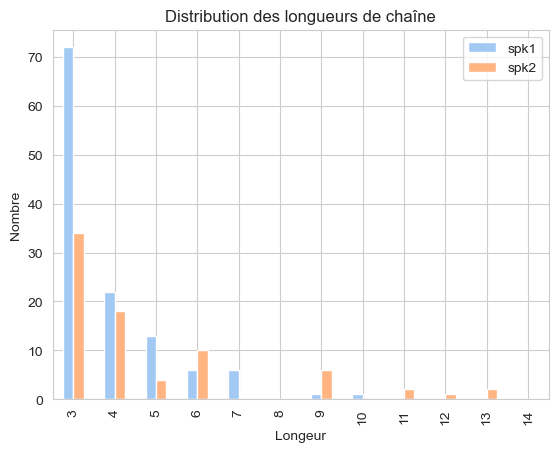

In [49]:
dfDistLongBar=pd.DataFrame.from_dict(spkLen,orient="index").sort_index().T.iloc[2:]
dfDistLongBar.name="Longueur de chaine"
dfDistLongBar.plot.bar(y=["spk1","spk2"],color=colors,
                    ylabel="Nombre",xlabel="Longeur",logy=True,
                    title="Distribution des longueurs de chaîne",legend=True)
dfDistLongBar.plot.bar(y=["spk1","spk2"],color=colors,
                    ylabel="Nombre",xlabel="Longeur",logy=False,
                    title="Distribution des longueurs de chaîne",legend=True)

In [ ]:
dfDistLong.to_excel(writer, sheet_name="Spk-Dist-Long")

In [ ]:
# plt.savefig("JE-BP-LongChaines-%s.pdf"%match)
pieCut=4
dfTemp=dfDistLong["spk1"][:pieCut].copy()
display(dfTemp)
autres=dfDistLong[["spk1"]][pieCut:].sum()
display(autres)
autres.index=["%d+"%(pieCut+1)]
dfTemp=pd.concat([dfTemp,autres])
ax=dfTemp.plot.pie(y=0,colors=colors, 
                   autopct='%.0f%%',
                   title="Distribution des longueurs de chaîne",
                   figsize=(7,7),legend=False)
ax.set_ylabel(None)
# dfTemp.to_excel("DistLongChaine-%s.xlsx"%match)
# plt.savefig("JE-PC-LongChaines-%s.pdf"%match)

In [ ]:
# plt.savefig("JE-BP-LongChaines-%s.pdf"%match)
dfTemp=dfDistLong["spk2"][:pieCut].copy()
display(dfTemp)
autres=dfDistLong[["spk2"]][pieCut:].sum()
display(autres)
autres.index=["%d+"%(pieCut+1)]
dfTemp=pd.concat([dfTemp,autres])
ax=dfTemp.plot.pie(y=0,colors=colors, 
                   autopct='%.0f%%',
                   title="Distribution des longueurs de chaîne",
                   figsize=(7,7),legend=False)
ax.set_ylabel(None)
# dfTemp.to_excel("DistLongChaine-%s.xlsx"%match)
# plt.savefig("JE-PC-LongChaines-%s.pdf"%match)

In [ ]:
dfGroupeReferents=df[(df.chaineIndex.notnull())].groupby(["speaker","numChaine","chaineIndex"])[["Cat","Transcription"]].agg(" ".join)
dfGroupeReferents.loc[("spk1",slice(None)),:]
# dfGroupeReferents.loc[dfGroupeReferents.index.get_level_values(0).isin(["spk1","spk2"])]

In [ ]:
df.head()

In [ ]:
dfSpkCat=df[(df.chaineIndex.notnull())].groupby(["speaker","Cat"])[["Referent"]].count()
dfSpkCat.to_excel(writer, sheet_name="Spk-Dist-Cat")
dfSpkCat.loc[dfSpkCat.index.get_level_values(0).isin(["spk1","spk2"])]

In [ ]:
df

### Stats par période

In [ ]:
chainesPer={}
perChaines={}
for num in range(maxNumChaine):
    n=num+1
    dfChaine=df.loc[df.numChaine==n]
    # display(dfChaine)
    try:
        chainesPer[n]={"spk":dfChaine.speaker.values[0],
                       "ref":dfChaine.Referent.values[0],
                       "type":dfChaine.type.values[0],
                       "chaine":{}}
        indexMax=int(dfChaine.chaineIndex.max())
        # print(indexMax)
        if indexMax not in perChaines:
            perChaines[indexMax]=0
        perChaines[indexMax]+=1
        for ind in range(indexMax):
            i=ind+1
            dfIndex=dfChaine.loc[dfChaine.chaineIndex==i]
            # display(dfIndex)
            chainesPer[n]["chaine"][i]=dfIndex[["Cat","Transcription"]].to_dict()
    except:
        print("pb",n,end=", ")
        # display(dfChaine)
print()
# print(chainesSpk)

#### longueur de chaines par speaker

In [ ]:
perLen={"Color commentary":{n+1:0 for n in range(14)},"Play by play":{n+1:0 for n in range(14)}}

for k,v in chainesPer.items():
    if v['type']==v['type']:
        per=v['type']
        lK=len(v["chaine"])
        if per not in perLen:
            perLen[per]={}
        if lK not in perLen[per]:
            perLen[per][lK]=0
        perLen[per][lK]+=1

In [ ]:
perLen

##### Nombre de chaines par longueur

In [ ]:
dfDistLong=pd.DataFrame.from_dict(perLen,orient="index").sort_index().T

In [ ]:
dfDistLong

In [ ]:
dfDistLongBar=pd.DataFrame.from_dict(perLen,orient="index").sort_index().T.iloc[0:]
dfDistLongBar.name="Longueur de chaine"
# dfDistLongBar.plot.bar(y=["Color commentary","Play by play"],color=colors,
#                     ylabel="Nombre",xlabel="Longeur",logy=True,
#                     title="Distribution des longueurs de chaîne",legend=True)
dfDistLongBar.plot.bar(y=["Colour commentary","Play by play"],color=colors,
                    ylabel="Nombre",xlabel="Longeur",logy=False,
                    title="Distribution des longueurs de chaîne",legend=True)

In [ ]:
dfDistLongBar.to_excel(writer, sheet_name="Type-Dist-Long")

In [ ]:
# plt.savefig("JE-BP-LongChaines-%s.pdf"%match)
pieCut=4
dfTemp=dfDistLong["Colour commentary"][:pieCut].copy()
display(dfTemp)
autres=dfDistLong[["Colour commentary"]][pieCut:].sum()
display(autres)
autres.index=["%d+"%(pieCut+1)]
dfTemp=pd.concat([dfTemp,autres])
ax=dfTemp.plot.pie(y=0,colors=colors, 
                   autopct='%.0f%%',
                   title="Distribution des longueurs de chaîne",
                   figsize=(7,7),legend=False)
ax.set_ylabel(None)
# dfTemp.to_excel("DistLongChaine-%s.xlsx"%match)
# plt.savefig("JE-PC-LongChaines-%s.pdf"%match)

In [ ]:
# plt.savefig("JE-BP-LongChaines-%s.pdf"%match)
dfTemp=dfDistLong["Play by play"][:pieCut].copy()
display(dfTemp)
autres=dfDistLong[["Play by play"]][pieCut:].sum()
display(autres)
autres.index=["%d+"%(pieCut+1)]
dfTemp=pd.concat([dfTemp,autres])
ax=dfTemp.plot.pie(y=0,colors=colors, 
                   autopct='%.0f%%',
                   title="Distribution des longueurs de chaîne",
                   figsize=(7,7),legend=False)
ax.set_ylabel(None)
# dfTemp.to_excel("DistLongChaine-%s.xlsx"%match)
# plt.savefig("JE-PC-LongChaines-%s.pdf"%match)

In [ ]:
dfGroupeReferents=df[(df.chaineIndex.notnull())].groupby(["type","numChaine","chaineIndex"])[["Cat","Transcription"]].agg(" ".join)
dfGroupeReferents.loc[("Play by play",slice(None)),:]
# dfGroupeReferents.loc[dfGroupeReferents.index.get_level_values(0).isin(["spk1","spk2"])]

In [ ]:
df.head()

In [ ]:
dfSpkCat=df[(df.chaineIndex.notnull())].groupby(["type","Cat"])[["Referent"]].count()
dfSpkCatDist=dfSpkCat.loc[dfSpkCat.index.get_level_values(0).isin(["Colour commentary","Play by play"])]

In [ ]:
dfSpkCatDist.loc[dfSpkCatDist.Referent>100]
dfSpkCatDistCut=dfSpkCatDist.loc[dfSpkCatDist.index.get_level_values(1).isin(["NAM",
                                                              "NOM",
                                                              "PRO:PER",
                                                              "PRO:REL"])]
autres=dfSpkCatDist.loc[~dfSpkCatDist.index.get_level_values(1).isin(["NAM",
                                                              "NOM",
                                                              "PRO:PER",
                                                              "PRO:REL"])]

In [ ]:
autresPlay=autres.loc[("Play by play",slice(None)),:].sum()
dfSpkCatDistCut.loc[("Play by play","Autres"),:]=autresPlay
autresColor=autres.loc[("Colour commentary",slice(None)),:].sum()
dfSpkCatDistCut.loc[("Colour commentary","Autres"),:]=autresColor


In [ ]:
dfSpkCatDistBar=dfSpkCatDistCut.reset_index().pivot(index="Cat",columns="type",values="Referent")
dfSpkCatDistBar.sort_values("Colour commentary",ascending=False,inplace=True)
xlabels=dfSpkCatDistBar.index.to_list()
xpop=xlabels.index("Autres")
xlabels.pop(xpop)
dfSpkCatDistBar=dfSpkCatDistBar.reindex(xlabels+["Autres"])


In [ ]:
dfSpkCatDistBar.name="Premier élément"
# dfDistLongBar.plot.bar(y=["Color commentary","Play by play"],color=colors,
#                     ylabel="Nombre",xlabel="Longeur",logy=True,
#                     title="Distribution des longueurs de chaîne",legend=True)
dfSpkCatDistBar.plot.bar(y=["Colour commentary","Play by play"],color=colors,
                    ylabel="Nombre",xlabel="Catégorie",logy=False,
                    title="Distribution des premiers éléments de chaîne",legend=True)

In [ ]:
dfSpkCatDistBar.to_excel(writer, sheet_name="Type-Dist-Cat")

In [ ]:
writer.close()